In [1]:
import load_dataset_1week
dataset = load_dataset_1week.load_dataset_minute(5161)

In [2]:
feature = dataset.drop(columns=['datetime', 'internet'])
target = dataset[['datetime', 'internet']]

In [5]:
import split_data
train_x, test_x, train_y, test_y, y_datetime = split_data.split_data_8_2(feature, target)

In [6]:
import normalize_train_test
train_x, test_x, train_y, test_y, mms_y = normalize_train_test.apply_MMS(train_x, test_x, train_y, test_y)

In [7]:
import set_timesteps
timesteps = 36
x_train, x_test, y_train, y_test = set_timesteps.create_timeseries_data(train_x, test_x, train_y, test_y, timesteps)

In [11]:
import build_model
time_unit = 'minute'
model, history = build_model.build_model_GRU_Optuna(x_train, y_train, timesteps, time_unit)

[I 2025-01-02 23:13:01,615] A new study created in memory with name: no-name-bc015c1f-9a64-4305-9564-9f050ef73c19


Enabled dynamic memory allocation.


[I 2025-01-02 23:13:05,032] Trial 0 finished with value: 0.010235270485281944 and parameters: {'neuron': 64, 'batch_size': 64, 'learning_rate': 0.0002215953929680393}. Best is trial 0 with value: 0.010235270485281944.
[I 2025-01-02 23:13:07,219] Trial 1 finished with value: 0.005664205178618431 and parameters: {'neuron': 256, 'batch_size': 32, 'learning_rate': 0.00046823892083856507}. Best is trial 1 with value: 0.005664205178618431.
[I 2025-01-02 23:13:17,547] Trial 2 finished with value: 0.0045760017819702625 and parameters: {'neuron': 64, 'batch_size': 32, 'learning_rate': 0.0004924051830595188}. Best is trial 2 with value: 0.0045760017819702625.
[I 2025-01-02 23:13:22,252] Trial 3 finished with value: 0.0051083192229270935 and parameters: {'neuron': 64, 'batch_size': 32, 'learning_rate': 0.0002636984791176975}. Best is trial 2 with value: 0.0045760017819702625.
[I 2025-01-02 23:13:27,202] Trial 4 finished with value: 0.005535502918064594 and parameters: {'neuron': 32, 'batch_size':

Best hyperparameters: {'neuron': 256, 'batch_size': 32, 'learning_rate': 0.000991160592855582}
Best model saved as 'C:\Users\goshima\Documents\卒業研究_AI\Python\Datasets\best_model\minute\best_model.h5'


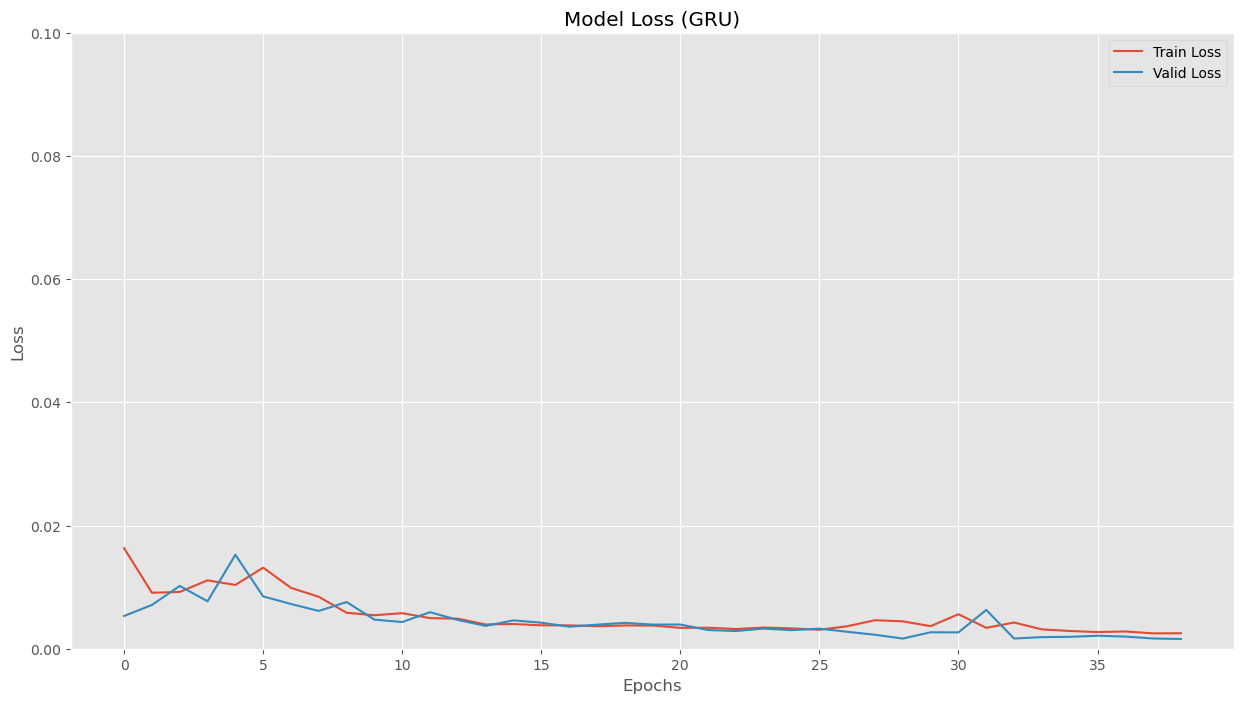

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフスタイル

plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title('Model Loss (GRU)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')

# y軸の上限値を指定（例：0から1.0までの範囲に設定）
plt.ylim(0, 0.1)
plt.show()

In [13]:
# テストデータに対する予測を行い、評価結果を表示
import evaluate_model_performance
y_test_pred, y_test_true = evaluate_model_performance.evaluate_model(x_test, y_test, mms_y, model)

6/6 [==============================] - 0s 3ms/step
RMSE: 342.2941176757156
MAE: 281.7801001018854
MAPE: 0.3417844931974724
MdAPE: 23.947352833433143
GMAPE: 31.71067739991711
R2: 0.876772018479261


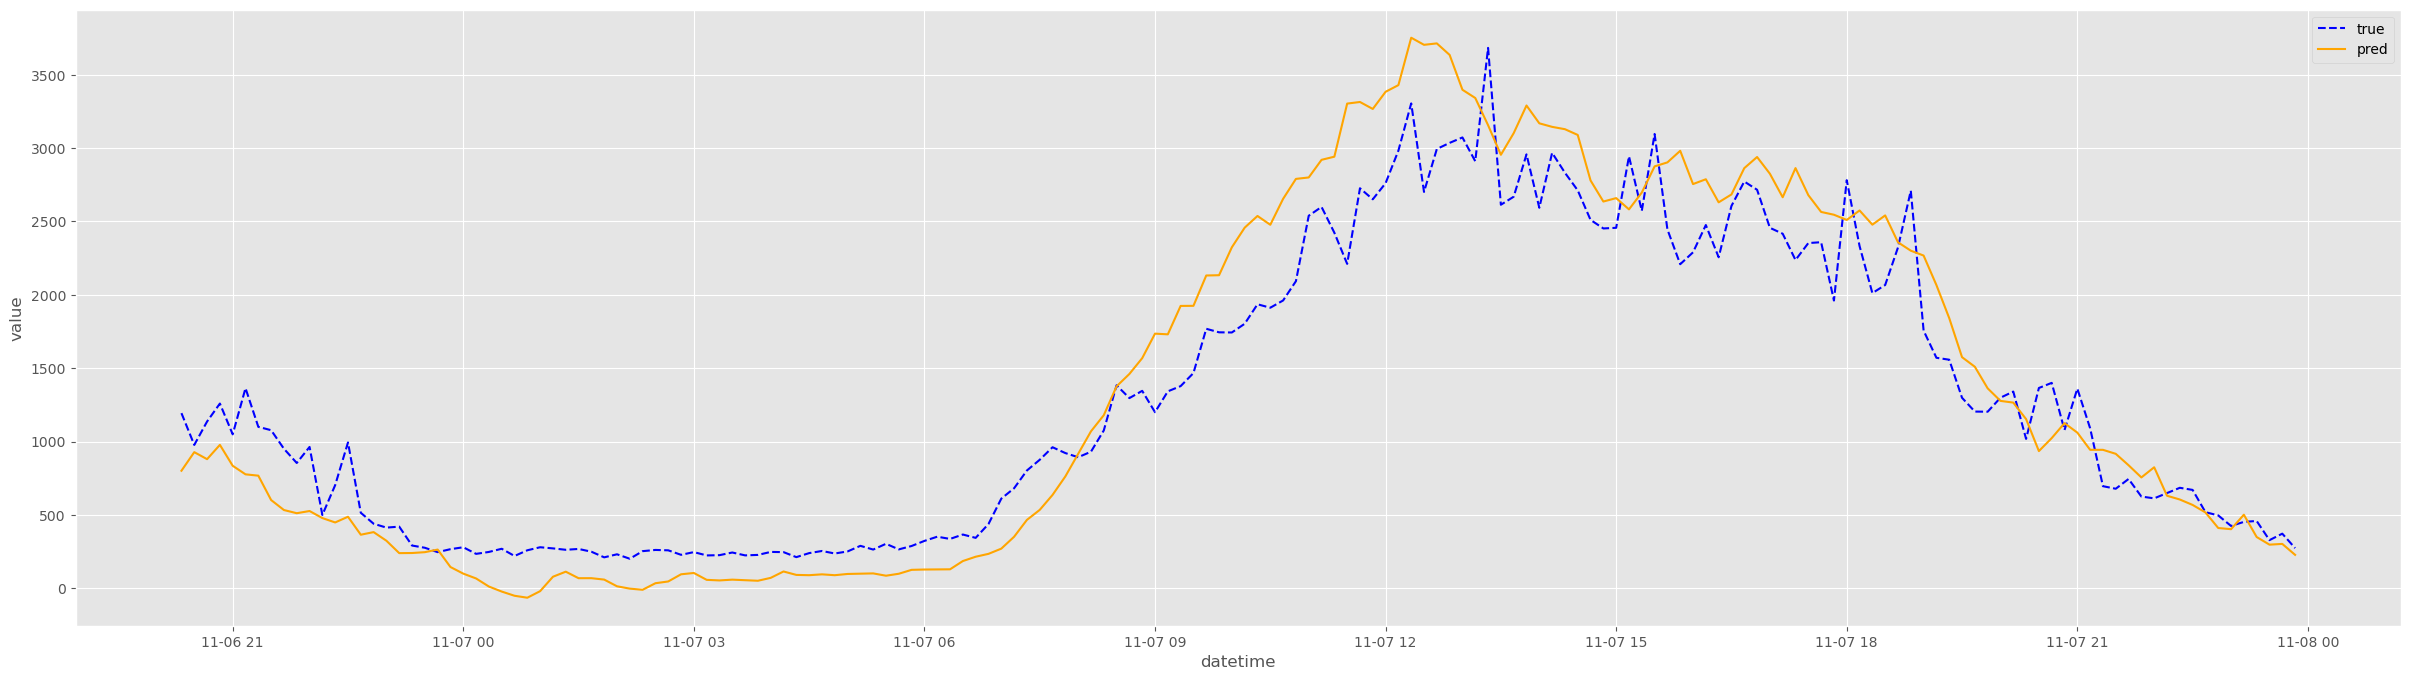

In [14]:
# テストデータ(青)と予測(黄色)を描画
datetime = y_datetime[timesteps:]

plt.figure(figsize=(30,8))
plt.plot(datetime, y_test_true, linestyle='--', color='blue', label='true')
plt.plot(datetime, y_test_pred, color='orange', label='pred')
plt.ylabel('value')
plt.xlabel('datetime')
plt.legend(loc='upper right')
plt.show()